## Modeling_WNV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

sns.set()

In [2]:
def plot_confusion_matrix(y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

In [3]:
def plot_auc_curve(fpr, tpr):
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [4]:
def feature_importance(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    features = X_train.columns
    plt.figure(figsize = (8,6))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [5]:
def model_coeff(model, X):
    print("Model coefficients:\n")
    for i in range(X.shape[1]):
        print(X.columns[i], "=", model.coef_[0,i].round(4))

In [6]:
def plot_impfeatures(model, columns):
    years = np.unique(df.year)
    ncol = len(years)
    nrow = len(columns)
    fig, ax = plt.subplots(nrow, ncol, figsize=(15, 3*nrow), squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        color= ['g','b','r','y']
        for j, yr in enumerate(years):
            ax[i,j].plot(df.loc[df.year==yr,col].apply(int), color=color[j])
            ax[i,0].set_ylabel(col)
            ax[0,j].set_title(yr)

In [69]:
def plot_impfeatures(models, model_label, ncol=None):
    if ncol is None:
        ncol = 2
    nrow = int(np.ceil(len(models) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=(15, 8*nrow), squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, model in enumerate(models):
        ax = axes.flatten()[i]
        print(model)
        importances = model.feature_importances_
        indices = np.argsort(importances)
        features = X_train.columns
        
        ax.barh(range(len(indices)), importances[indices], color='b', align='center')
        ax.set(title=model_label[i])
        ax.set(xlabel='Relative Importance')
        ax.set_yticks(range(len(indices)), [features[i] for i in indices])
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [8]:
def plot_shap_summary(models, model_label, ncol=None):
    if ncol is None:
        ncol = 2
    nrow = int(np.ceil(len(models) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=(15, 8*nrow), squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, model in enumerate(models):
        ax = axes.flatten()[i]
        explainer = shap.Explainer(model.predict,X_test)
        lr_shap_values = explainer(X_test)
        #summary_plot
        shap.plots.beeswarm(lr_shap_values)
        plt.title(model_label[i])
        #ax.set(title=model_label[i])
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [104]:
def auc_score(model, y_test, X_test):
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc_score = metrics.auc(fpr, tpr)
    return auc_score

In [9]:

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
final_df = pd.read_csv('../clean_data/final_df.csv')
final_df.head()

,AddressAccuracy,NumMosquitos,WnvPresent,Dist_St2,Station,PrecipTotal,ResultSpeed,ResultDir,AvgSpeed,Tvaglag1,Tvaglag2,Tvaglag3,Tvaglag4,PTotallag1,PTotallag2,PTotallag3,PTotallag4
0,9.0,1.0,0.0,15.8356,2,0.00,2.1,13,3.7,79.0,76.0,77.0,77.0,0.00,0.00,0.000,0.92
1,5.0,1.0,0.0,17.7680,2,0.00,13.4,30,14.1,76.0,79.0,80.0,69.0,0.00,0.05,0.060,0.00
2,8.0,1.0,0.0,14.0404,2,0.02,5.4,11,6.3,68.0,69.0,66.0,71.0,0.00,0.00,0.000,0.00
3,8.0,1.0,0.0,18.0890,2,0.87,6.3,18,10.5,72.0,68.0,61.0,64.0,0.11,0.00,0.001,0.00
4,9.0,3.0,0.0,8.1801,2,0.00,2.1,13,3.7,79.0,76.0,77.0,77.0,0.00,0.00,0.000,0.92


In [11]:
y = final_df['WnvPresent']
X = final_df.drop(columns = 'WnvPresent')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Model 1: Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()

In [15]:
lr.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [16]:
y_pred = lr.predict(X_test)

In [17]:
score = lr.score(X_test, y_test)
print(score)

0.7142857142857143


In [18]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[144  53]
 [ 51 116]]


In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

0.712787622724095

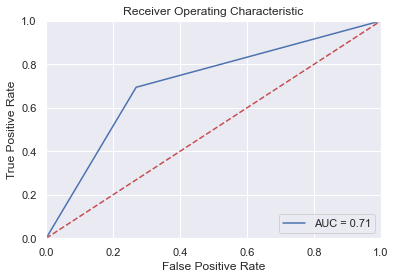

In [20]:
plot_auc_curve(fpr, tpr)

In [89]:
explainer = shap.Explainer(lr.predict,X_test)
lr_shap_values = explainer(X_test)


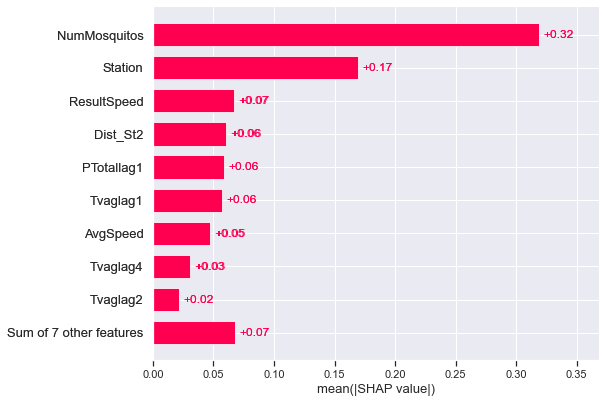

In [95]:
#summary_plot
# fig, ax = plt.subplots(1,2)
shap.plots.bar(lr_shap_values, show = False)
shap.plots.bar(lr_shap_values, show = False)

## Model 2: Random Forest 

In [23]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

In [24]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [25]:
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [26]:
y_pred_rf = rf.predict(X_test)

In [27]:
score = rf.score(X_test, y_test)
print(score)

0.31104215934664026


In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf)
metrics.auc(fpr, tpr)

0.8323961214626584

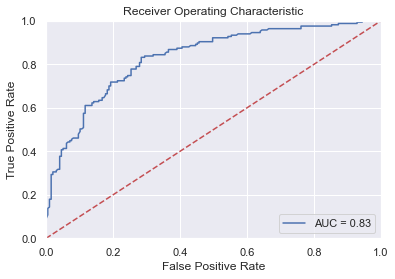

In [29]:
plot_auc_curve(fpr,tpr)

In [31]:
# explainer = shap.Explainer(rf.predict,X_test)
# rf_shap_values = explainer(X_test)
# #summary_plot
# shap.plots.beeswarm(rf_shap_values)

## Model 3: Decision Tree Classifier

In [32]:
from sklearn import tree

In [33]:
dtree = tree.DecisionTreeClassifier()

In [34]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred_dt = dtree.predict(X_test)

In [36]:
score = dtree.score(X_test, y_test)
print(score)

0.7032967032967034


In [37]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_dt)
metrics.auc(fpr, tpr)

0.7040031611903097

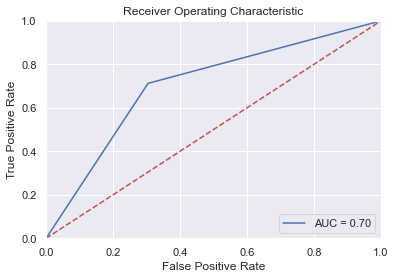

In [38]:
plot_auc_curve(fpr,tpr)

## Model 4: K Nearest neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(3)

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
y_pred_knn = knn.predict(X_test)

In [44]:
score = knn.score(X_test, y_test)
print(score)

0.717032967032967


In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn)
metrics.auc(fpr, tpr)

0.7203410438007234

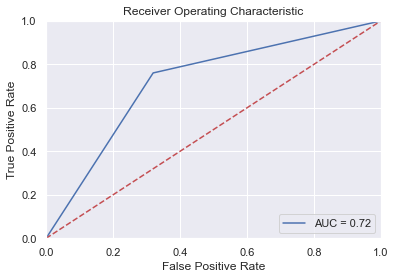

In [46]:
plot_auc_curve(fpr,tpr)

In [47]:
# explainer = shap.Explainer(knn.predict,X_train)
# knn_shap_values = explainer(X_test)
# #summary_plot
# shap.plots.beeswarm(knn_shap_values)

## Model 5: Gradient Boosting

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
ada = AdaBoostClassifier()

In [50]:
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [51]:
y_pred_ada = ada.predict(X_test)

In [52]:
score = ada.score(X_test, y_test)
print(score)

0.7362637362637363


In [53]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ada)
metrics.auc(fpr, tpr)

0.7358278367123621

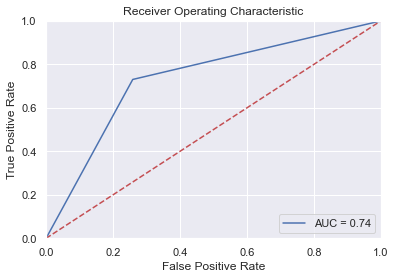

In [54]:
plot_auc_curve(fpr,tpr)

## Model 6: Xgboost

In [56]:
from xgboost import XGBRegressor

In [57]:
xg_reg = XGBRegressor(learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [58]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
y_pred_xg = xg_reg.predict(X_test)

In [60]:
score = xg_reg.score(X_test, y_test)
print(score)

0.20777300588820224


In [61]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_xg)
metrics.auc(fpr, tpr)

0.7943098574424754

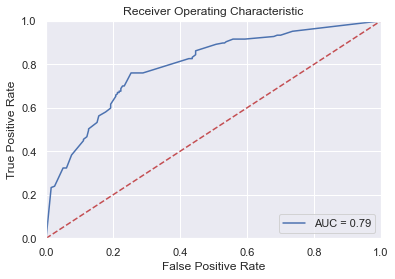

In [62]:
plot_auc_curve(fpr,tpr)

In [64]:
# explainer = shap.Explainer(xg_reg.predict,X_train)
# xg_shap_values = explainer(X_test)
# #summary_plot
# shap.plots.beeswarm(xg_shap_values)

In [99]:
model = [lr, rf, dtree, knn, ada, xg_reg ]
model_name =['LogisticRegression', 'RandomForest', 'Decision Tree', 'KNN','AdaBoost', 'XGBoost']

## AUC Score

In [110]:
for i, name in enumerate(model):
    val = auc_score(model[i], y_test, X_test)
    print('The AUC Socre for %s is %.4f' % (model_name[i],val))

The AUC Socre for LogisticRegression is 0.7128
The AUC Socre for RandomForest is 0.8324
The AUC Socre for Decision Tree is 0.7040
The AUC Socre for KNN is 0.7203
The AUC Socre for AdaBoost is 0.7358
The AUC Socre for XGBoost is 0.7943


Since RandomForest and XGBoost has the two highest AUC score we will consider these two models

## Feature Importance

RandomForestRegressor(n_estimators=1000, random_state=42)
XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


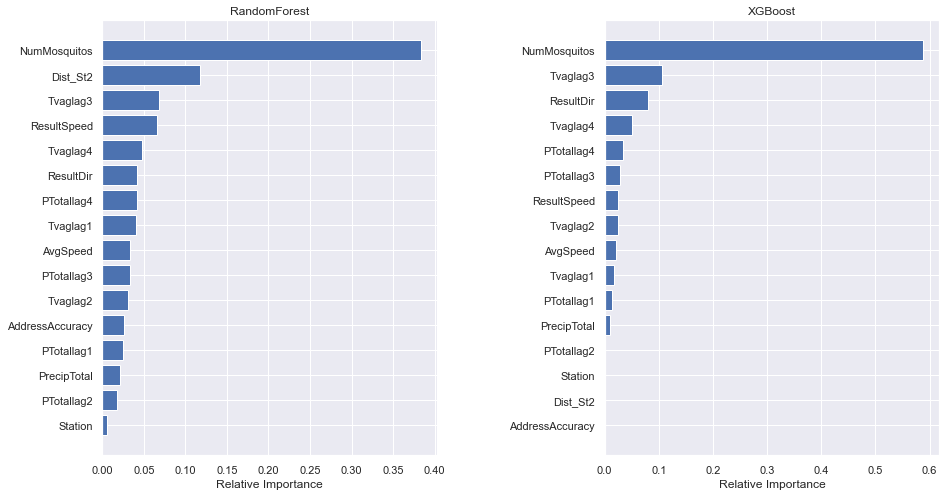

In [112]:
imp_model = [rf,xg_reg ]
imp_model_name =['RandomForest', 'XGBoost']
plot_impfeatures(imp_model, imp_model_name)

## Using SHAP to understand these two models 

In [121]:
def shap_values(model):
    explainer = shap.Explainer(model.predict,X_train[0:100])
    shap_values = explainer(X_test)
    return shap_values

In [122]:
rf_shap_values = shap_values(rf)

Permutation explainer: 365it [17:02,  2.83s/it]                                                                             


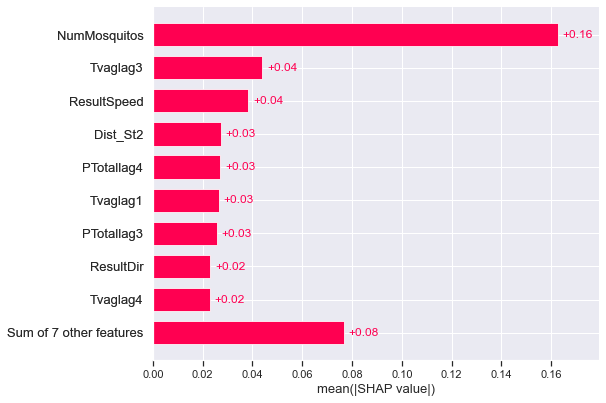

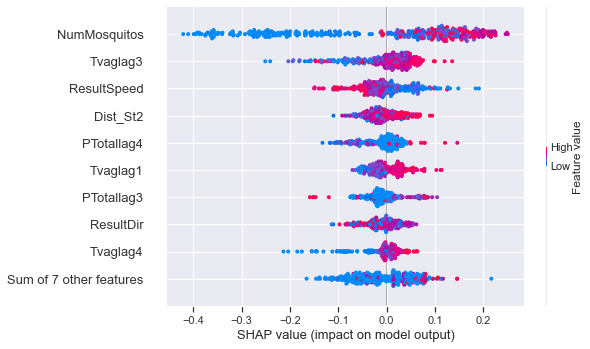

In [123]:
shap.plots.bar(rf_shap_values)
shap.plots.beeswarm(rf_shap_values)

In [124]:
xg_shap_values = shap_values(xg_reg)

Permutation explainer: 365it [00:19,  9.03it/s]                                                                             


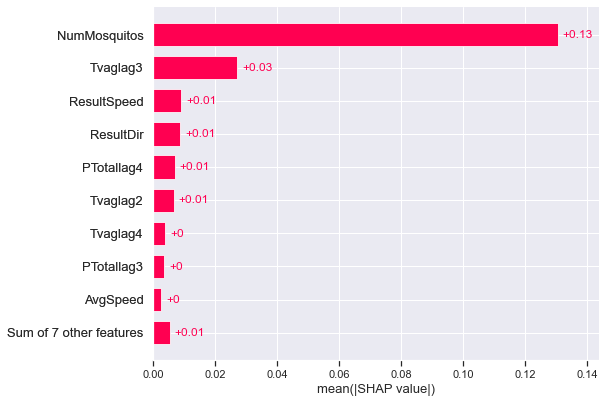

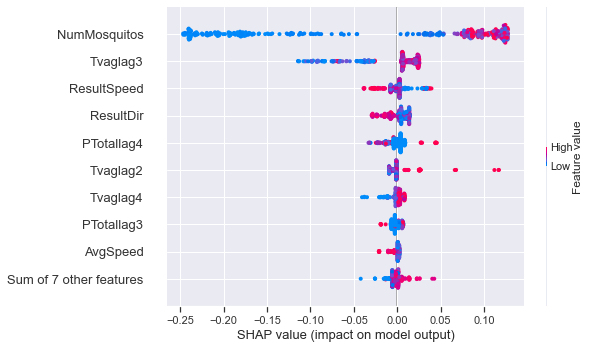

In [125]:
shap.plots.bar(xg_shap_values)
shap.plots.beeswarm(xg_shap_values)